## Start your script

Import libraries and fill the empty `base` string with the filepath for your data. Don't forget that Python will require you to double your backslashes -- instead of typing '\\' between folder names, type '\\\\'. The URL to use for all natural language processing questions is pre-loaded for you.

In [55]:

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud

import networkx as nx
import nltk
nltk.download('punkt') 
nltk.download('stopwords') 

url = 'https://www.bellarmine.edu/business/faculty/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

base = ''
df = pd.read_csv('hr_network_data.csv')


nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ankush
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ankush
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Ankush
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. How many faculty members are in Bellarmine's Business School?
(*Hint:* Faculty names in the soup's HTML code are denoted by the "h2" tag.)

In [66]:
url = 'https://www.bellarmine.edu/business/faculty/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())
soup.find_all(class_="sfContentBlock")
print('Number of names found:', len(soup.find_all(class_ ="sfContentBlock")))


<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Business Faculty
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="gkVwbYpF9JOAGl5C3JuD3xd_KAZ4L5uEF-Tl6Vy2BCo" name="google-site-verification"/>
  <!--<link href="/_res/bootstrap/less/bootstrap.min.css?v=2" rel="stylesheet" />-->
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.0/css/bootstrap.min.css" rel="stylesheet"/>
  <style>
   div[aria-label="Bread Crumb"] {
        font-size: 11px;
        line-height: 14px;
        padding-bottom: 5px;
    }
  </style>
  <link href="https://www.bellarmine.edu/sf-images/default-source/template/favicon.png?sfvrsn=364d7980_2" rel="shortcut icon" type="image/x-icon">
   <link href="//maxcdn.bootstrapcdn.com/font-awesome/4.3.0/css/font-awesome.min.css" rel="stylesheet"/>
   <link href="https://fonts.googleapis.com/css2?family=Amiri:ital,wght@0,400;0,700;1,400&amp;family=Kumbh+Sa

## 2. Look at the "p" tag in the soup. What information can we see for each professor?

In [31]:
print('The "p" tag in the soup shows the biography and description about the professor')

The "p" tag in the soup shows the biography and description about the professor


## 3. Use the code below to extract only the faculty biographies from the "p" tag. What are the five most common words before pre-processing?

Dr. Munshi is Dean of the Rubel School of Business and Professor of Management in the Department of Business Administration, prior to which, she was Associate Dean of Graduate Business and Professor of Management and Entrepreneurship at Saint Mary’s College of California. She received her PhD in Strategy, Organization, and Environment, from University of Pittsburgh’s Katz Graduate School of Business. Her research interests in strategic and social innovation have led to publications in journals such as Organizational Dynamics, Journal of Asia-Pacific Business, Technological Forecasting and Social Change, Business and Society Review. She holds an MBA in International Business and Management from Millsaps College, and a Master of Combined Sciences in Biochemistry and Molecular Biology from University of Mississippi Medical Center. She received her Bachelor of Science degree in Zoology and Biochemistry from Saint Xavier’s College, in her native home of Mumbai, India. She has been a visitin

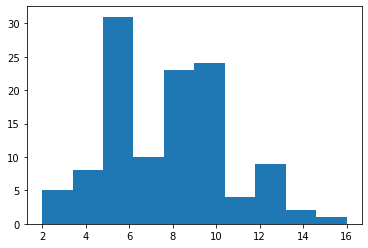

In [64]:
# Remove the contact information from the paragraph and create the "facbios" string
untidybio = soup.find_all("p")
li_header = untidybio[1].text
print(li_header)
tidybio = []
for bio in untidybio:
    tidybio.append(bio.text)
tidybio_start = tidybio[1:11:2]
tidybio_end = tidybio[12::2]
biography = ' '.join(tidybio_start + tidybio_end)

counter = Counter(word_tokenize(li_header))
print('Top 5 most common words before pre-processing:', counter.most_common(5))


## 4. Use the code below to extract only the faculty biographies from the "p" tag. What are the five most common words after removing stopwords and characters?

Dr. Munshi is Dean of the Rubel School of Business and Professor of Management in the Department of Business Administration, prior to which, she was Associate Dean of Graduate Business and Professor of Management and Entrepreneurship at Saint Mary’s College of California. She received her PhD in Strategy, Organization, and Environment, from University of Pittsburgh’s Katz Graduate School of Business. Her research interests in strategic and social innovation have led to publications in journals such as Organizational Dynamics, Journal of Asia-Pacific Business, Technological Forecasting and Social Change, Business and Society Review. She holds an MBA in International Business and Management from Millsaps College, and a Master of Combined Sciences in Biochemistry and Molecular Biology from University of Mississippi Medical Center. She received her Bachelor of Science degree in Zoology and Biochemistry from Saint Xavier’s College, in her native home of Mumbai, India. She has been a visitin

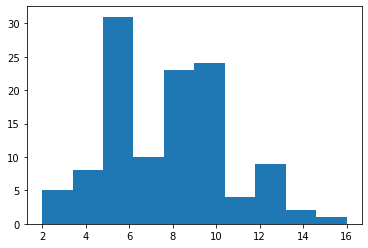

In [63]:
# Remove the contact information from the paragraph and create the "facbios" string
untidybio = soup.find_all("p")
li_header = untidybio[1].text
print(li_header)
tidybio = []
for bio in untidybio:
    tidybio.append(bio.text)
tidybio_start = tidybio[1:11:2]
tidybio_end = tidybio[12::2]
biography = ' '.join(tidybio_start + tidybio_end)

tokens = [w for w in word_tokenize(li_header.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]
counter = Counter(no_stops)
print('Top 5 most common words after pre-processing:', counter.most_common(5))
word_lengths = [len(w) for w in no_stops]
plt.hist(word_lengths)
plt.show()


## 5. Use the code below to extract only the faculty biographies from the "p" tag. Create a wordcloud from the Bellarmine business school faculty biographies.
(*Hint:* Don't forget to remove symbols, capitals, and stopwords before joining the text with a space.)

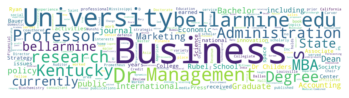

In [69]:
# Remove the contact information from the paragraph and create the "facbios" string
untidybio = soup.find_all("p")
tidybio = []
for bio in untidybio:
    tidybio.append(bio.text)
tidybio_start = tidybio[1:11:2]
tidybio_end = tidybio[12::2]
biography = ' '.join(tidybio_start + tidybio_end)

wordcloud = WordCloud(background_color="white", width=1584, height=396).generate(biography)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 6. Create a directed graph object with the HR network data stored in `df`. How many nodes and edges are there?
(*Hint:* Look at the dataframe head to find the column names for the graph.)

In [36]:
df = pd.read_csv('hr_network_data.csv')
G_data = nx.DiGraph()
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=G_data)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 92
Number of edges: 755
Average in degree:   8.2065
Average out degree:   8.2065


## 7. What node has the highest betweenness centrality? What node has the lowest betweenness centrality? What are their values?

In [38]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print('Highest Betweenness Centrality:', betweenness_centrality_sorted[0])
print('Lowest Betweenness Centrality:', betweenness_centrality_sorted[-1])
print('Highest is 311 and lowest is 63')

Highest Betweenness Centrality: (311, 0.030492964839725897)
Lowest Betweenness Centrality: (63, 0.0)
Highest is 311 and lowest is 63


## 8. What is the shortest path between nodes 101 and 481?

In [39]:
shortest = nx.shortest_path(G, source=101, target=481)
print('Shortest path between Node 1 and Node 29:', shortest)
print('Length of that path:', len(shortest)-1)

Shortest path between Node 1 and Node 29: [101, 102, 271, 481]
Length of that path: 3


## 9. What is the density of this network? What does this tell you about the connectedness of the network?

In [40]:
nx.density(G)


0.09018155757286192

## 10. Plot the network graph using the `nx.draw_networkx` command
(*Hint:* Use the `Weight` column divided by 100 to set the edge widths.)